In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from nn import NeuralNetwork
from hedger import Hedger
from instruments import BrownianStock, EuropeanOption
from finance import pl

tensor(0.2195, grad_fn=<NegBackward0>)
tensor(0.1102, grad_fn=<NegBackward0>)
tensor(0.0753, grad_fn=<NegBackward0>)
tensor(0.0722, grad_fn=<NegBackward0>)
tensor(0.0790, grad_fn=<NegBackward0>)
tensor(0.0671, grad_fn=<NegBackward0>)
tensor(0.0559, grad_fn=<NegBackward0>)
tensor(0.0351, grad_fn=<NegBackward0>)
tensor(0.0328, grad_fn=<NegBackward0>)
tensor(0.0320, grad_fn=<NegBackward0>)


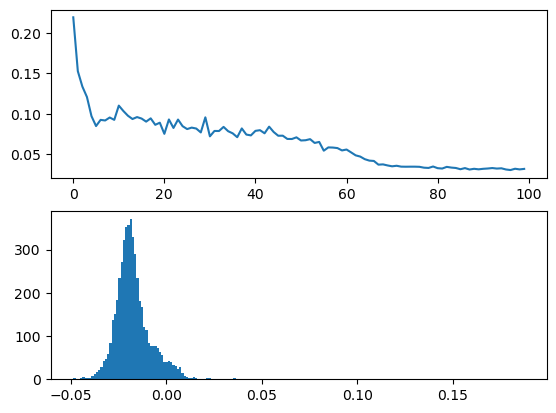

In [6]:
n_paths = 500
n_epochs = 100
n_features = 2

model = NeuralNetwork(n_features, 1)
underlier = BrownianStock(mu=0, sigma=.2)
derivative = EuropeanOption(underlier, call=True, strike=1.1, maturity=100/250)
hedger = Hedger(model, underlier, derivative)
history = hedger.fit(n_epochs=n_epochs, n_paths=n_paths)
results = hedger.test(n_paths=5000)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(history)
ax2.hist(results, bins=200)
plt.show()